In [58]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [59]:
training_set = tf.keras.utils.image_dataset_from_directory(r"C:\Users\Maithili kavthe\OneDrive\Desktop\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [60]:
validation_set = tf.keras.utils.image_dataset_from_directory(r"C:\Users\Maithili kavthe\OneDrive\Desktop\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [61]:
cnn = tf.keras.models.Sequential()

In [62]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

c:\Users\Maithili kavthe\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [64]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [65]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [66]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [67]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [68]:
cnn.add(tf.keras.layers.Flatten())

In [69]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [70]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [71]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [72]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [73]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2197s 999ms/step - accuracy: 0.3939 - loss: 2.1686 - val_accuracy: 0.8675 - val_loss: 0.4219
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2341s 1s/step - accuracy: 0.8396 - loss: 0.5069 - val_accuracy: 0.9381 - val_loss: 0.1884
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2327s 1s/step - accuracy: 0.9068 - loss: 0.2903 - val_accuracy: 0.9552 - val_loss: 0.1402
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2309s 1s/step - accuracy: 0.9344 - loss: 0.2034 - val_accuracy: 0.9580 - val_loss: 0.1249
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2289s 1s/step - accuracy: 0.9513 - loss: 0.1474 - val_accuracy: 0.9798 - val_loss: 0.0640
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2238s 1s/step - accuracy: 0.9643 - loss: 0.1089 - val_accuracy: 0.9826 - val_loss: 0.0536
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2076s 945ms/step - accuracy: 0.9705 - loss: 0.0923 - val_accuracy: 0.9799 - val_loss: 0.0598
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2261s 1s/step - accuracy: 0.

In [75]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 591s 269ms/step - accuracy: 0.9777 - loss: 0.0728
Training accuracy: 0.978888988494873


In [76]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 580s 264ms/step - accuracy: 0.9785 - loss: 0.0675
Validation accuracy: 0.978888988494873


### Saving Model

In [99]:
cnn.save('trained_plant_disease_model.keras')

In [100]:
training_history.history #Return Dictionary of history

{'accuracy': [0.6023472547531128,
  0.8630627989768982,
  0.9147592186927795,
  0.9398961663246155,
  0.9549185633659363,
  0.9635962843894958,
  0.9721886515617371,
  0.9762998819351196,
  0.9794579744338989,
  0.9809944033622742],
 'loss': [1.3591053485870361,
  0.4320455491542816,
  0.2611645758152008,
  0.18448220193386078,
  0.13619156181812286,
  0.10833301395177841,
  0.08598819375038147,
  0.07405649125576019,
  0.06224876269698143,
  0.05874105915427208],
 'val_accuracy': [0.8674585819244385,
  0.9381464123725891,
  0.9551888704299927,
  0.9580339789390564,
  0.9797993898391724,
  0.9826445579528809,
  0.9799132347106934,
  0.984095573425293,
  0.9918628931045532,
  0.978888988494873],
 'val_loss': [0.4218878149986267,
  0.18841303884983063,
  0.1402188390493393,
  0.12493198364973068,
  0.0640023872256279,
  0.0535924918949604,
  0.059773869812488556,
  0.04816345125436783,
  0.025118032470345497,
  0.06712998449802399]}

In [101]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [102]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


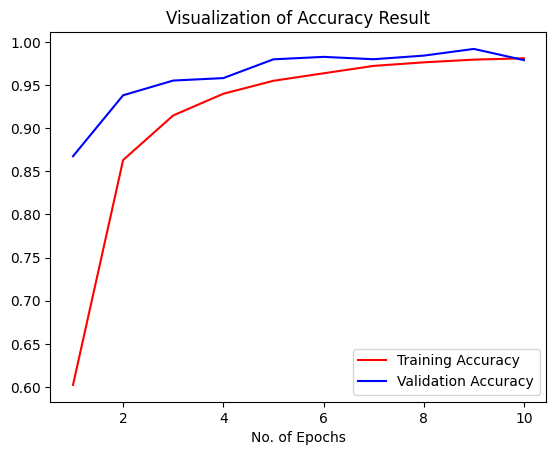

In [103]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [104]:
class_name = validation_set.class_names

In [91]:
test_set = tf.keras.utils.image_dataset_from_directory(r"C:\Users\Maithili kavthe\OneDrive\Desktop\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [105]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 278s 16ms/step


In [106]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [107]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [108]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [109]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [110]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.91      0.95       504
                                 Apple___Black_rot       0.97      0.98      0.97       497
                          Apple___Cedar_apple_rust       0.96      0.97      0.97       440
                                   Apple___healthy       0.93      0.95      0.94       502
                               Blueberry___healthy       0.96      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.96      0.97       421
                 Cherry_(including_sour)___healthy       0.93      0.98      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.90      0.93       410
                       Corn_(maize)___Common_rust_       0.98      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.97      0.

### Confusion Matrix Visualization

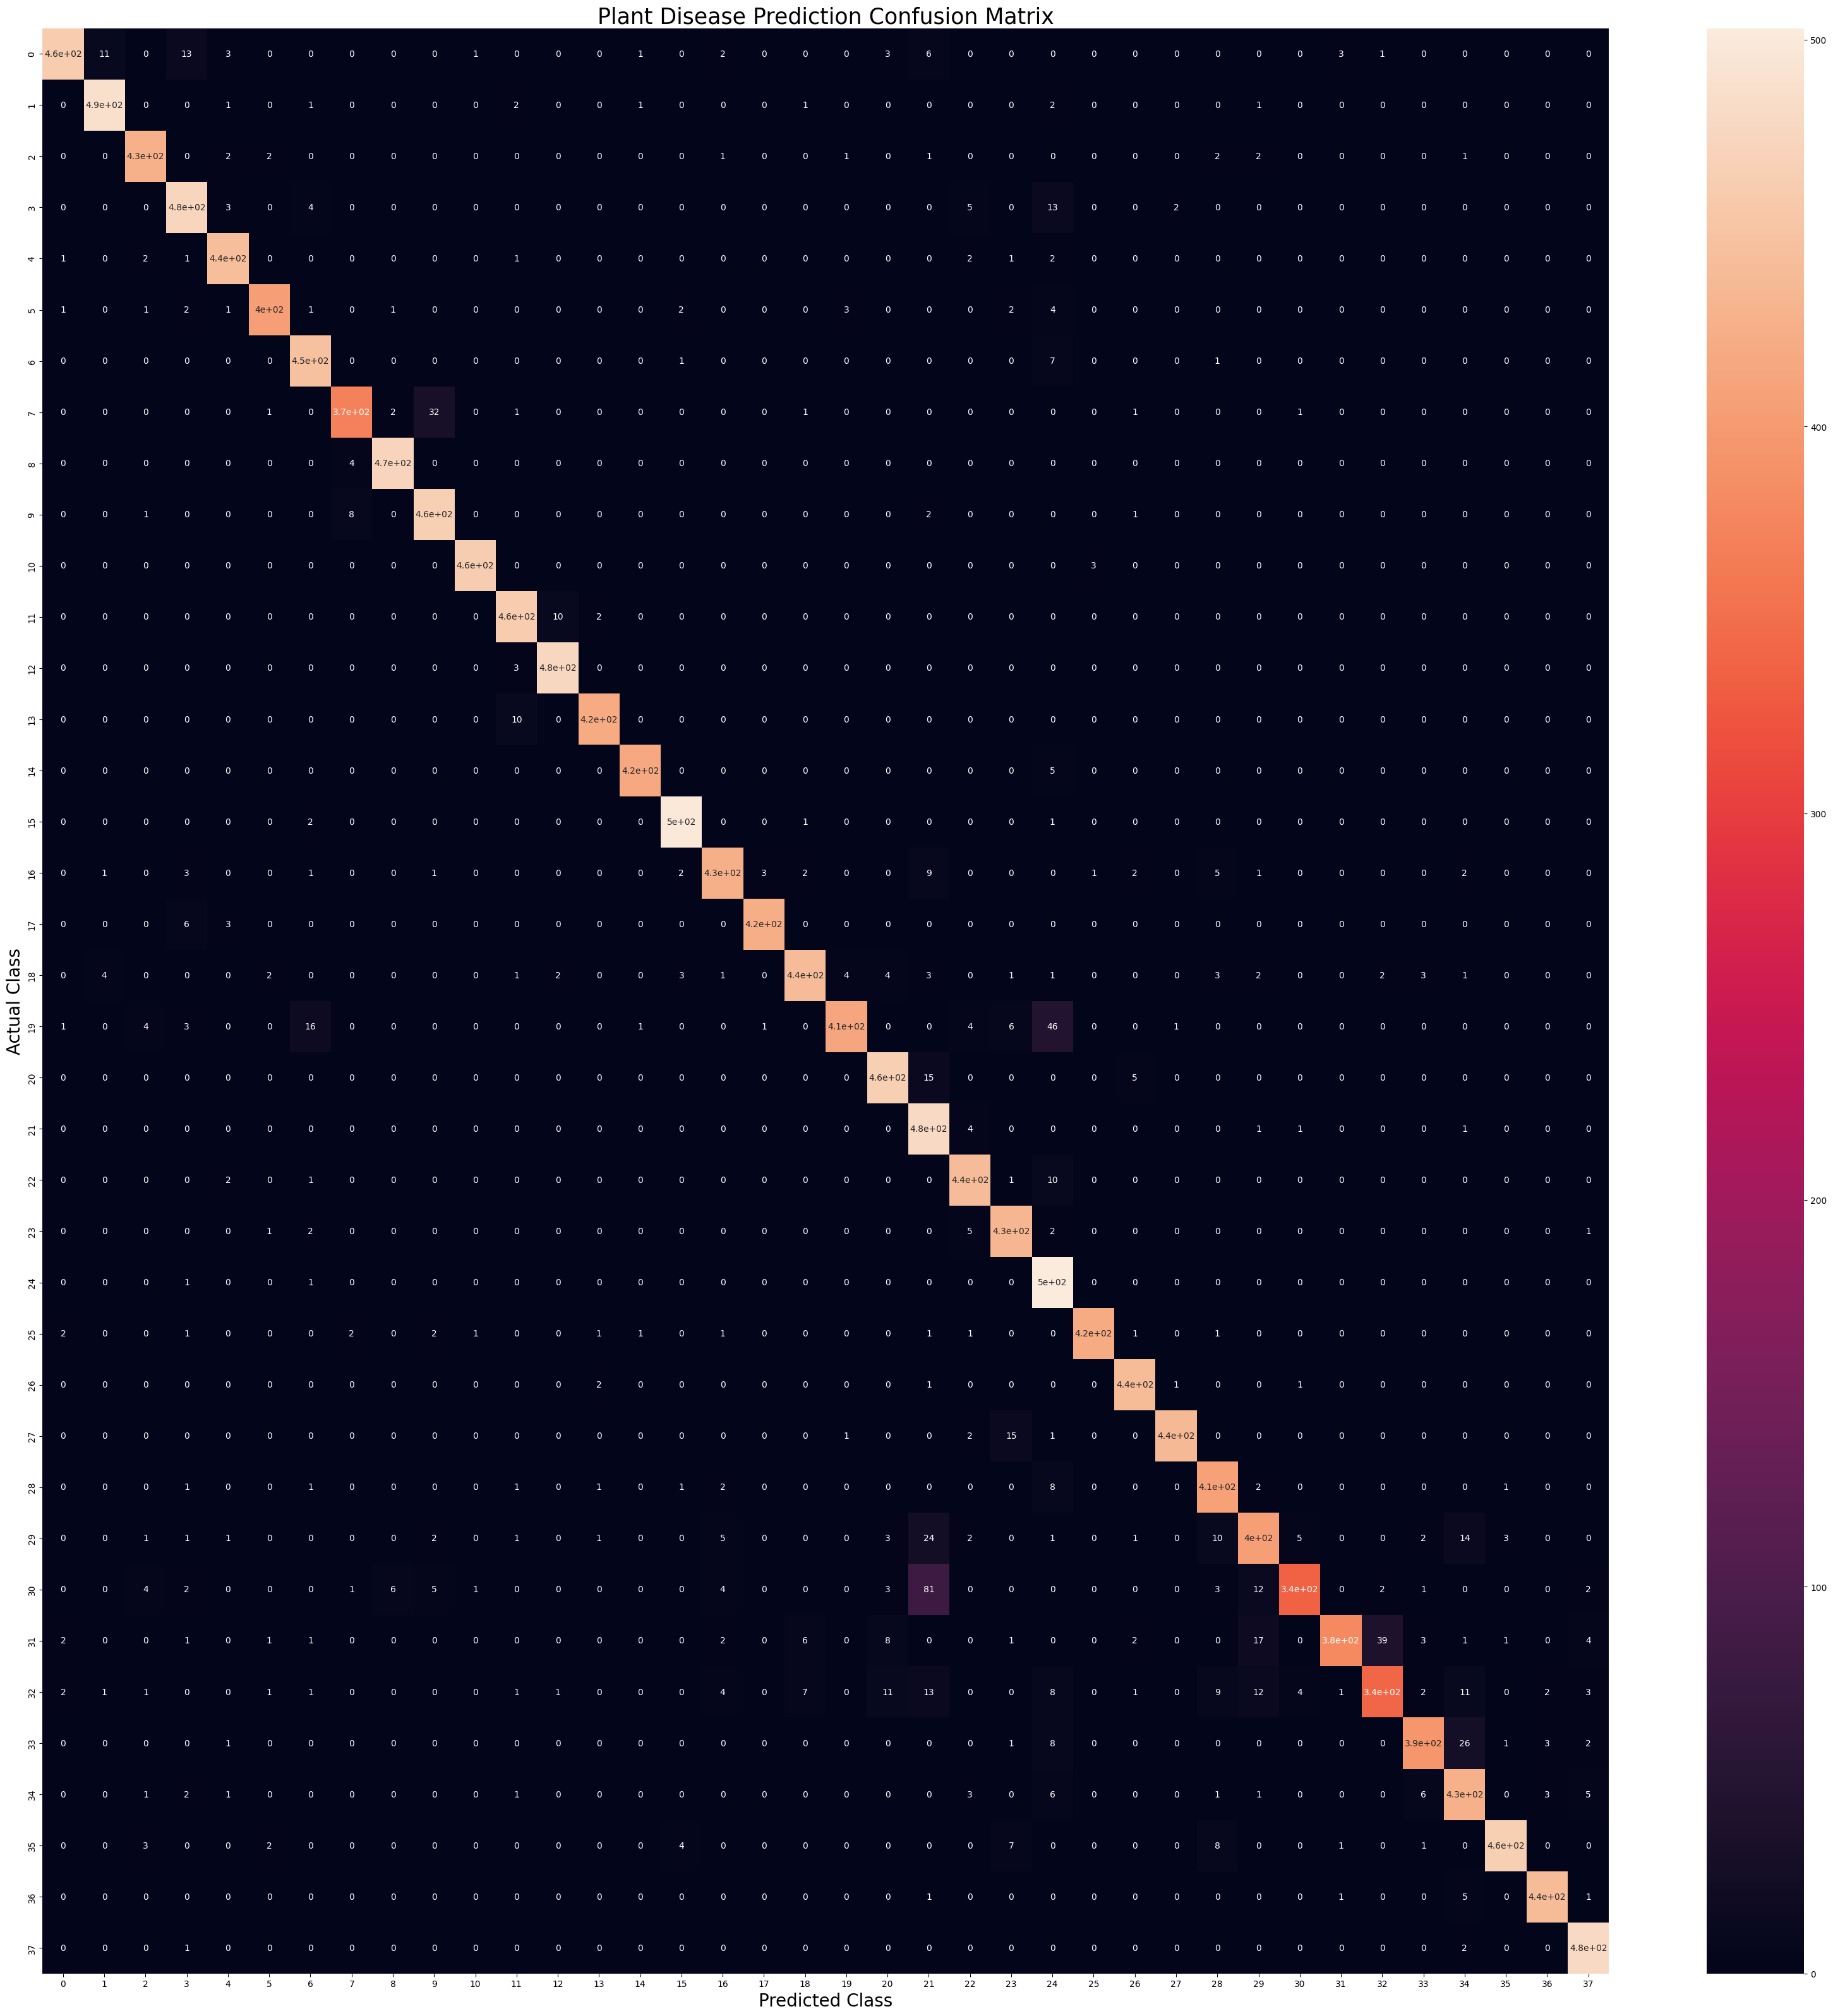

In [111]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()